## Objective

You are a data scientist for a top movie studio.

After a series of box office flops, the producers at your
studio are starting to question their strategy and need a new direction. 

You suggest a new approach -
using data to determine what factors go into making a successful film.

Luckily, you have a dataset of over 5,000 films to mine for insights! The producers ask you to analyze the
data and present a report detailing your findings and recommendations on revamping the studio’s
strategy.

## Data
Attached is The Zebra movie dataset for use.
**Data Dictionary (selected columns)**

* `num_critic_reviews` - number of movie reviews written by critics
* `num_user_reviews` - number of movie reviews written by IMDB users
* `num_users_voted` - number of IMDB users that rated the film
* `duration` - the length of the film in minutes
* `actor_n_facebook_likes` - the number of likes on the actor’s Facebook page (we can assume this was `measured before the film was released)
* `gross` - the film’s gross revenue
* `movie_score` - the film’s rating on a 1-10 scale by users that voted

### Goal
* only supposed to spend **6 hours** on this

### Planned Breakdown
* **1 hour** setup (power point starter and code set)
  * includes some basic time for understanding and research
* 3 key insights - **3 hours**, put each as own notebook
* what we could explore, next steps, code checking, **1 hour**
* presentation build and script build and practice **1 hours**


## A note on Data

[IMDB Site Stats](https://www.imdb.com/pressroom/stats/)

This is sample is only 5,000 of 600,000 of the Titles that are available to IMDB as of September 2024 which is about 0.83% of the available data, **can be useful to round to to a 1% sample of the total data.**

* A Movie can have multiple titles and we need a way to identify all of the columns uniquely, in that way we pick the non null (pkid has to be non null) columns and use them to make a candidate key, the data will be deduplicated on those columns.
* TODO: go up stream and understand the query used to get this data, consider data design

In [1]:
# !pip install missingno # only used for this shouldn't be in requirements

In [2]:
import sys

import numpy as np
import missingno as msno
import pandas as pd
from dotenv import find_dotenv, dotenv_values

config = dotenv_values(find_dotenv(".env"))

sys.path.append("..")
from src.make_data import build_metrics, clean_df

sys.tracebacklimit = 0 # easier to see problems


## Load Data

In [3]:

df_raw = pd.read_csv(config["raw_data_path"])
print(df_raw.shape)


df = clean_df(df_raw, save_local=True)
print(df.shape)

df = build_metrics(df)

assert df.duplicated().sum()==0, "failed naive duplicate check"

df.head(2).T

(5043, 26)
saving at ..//data/interim/the_zebra_movie_data_cleaned.csv
columns added - [movie_title_clean, movie_franchise, decade]
dropping the rows 123 because they are duplicated - taking max audience score
(4920, 30)
shape - (4920, 35), columns added - ['budget_log', 'gross_log', 'lift', 'profit', 'ROI']


,1937,66
color,Color,Color
director_name,Frank Darabont,Christopher Nolan
num_critic_reviews,199.0,645.0
duration,142.0,152.0
director_facebook_likes,NaN,22000.0
actor_3_facebook_likes,461.0,11000.0
actor_2_name,Jeffrey DeMunn,Heath Ledger
actor_1_facebook_likes,11000.0,23000.0
gross,28341469.0,533316061.0
genres,Crime|Drama,Action|Crime|Drama|Thriller


In [4]:
# fair amount of nulls  -- dive further on those
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4920 entries, 1937 to 4958
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4901 non-null   object 
 1   director_name              4818 non-null   object 
 2   num_critic_reviews         4871 non-null   float64
 3   duration                   4905 non-null   float64
 4   director_facebook_likes    3939 non-null   float64
 5   actor_3_facebook_likes     4808 non-null   float64
 6   actor_2_name               4907 non-null   object 
 7   actor_1_facebook_likes     4887 non-null   float64
 8   gross                      4056 non-null   float64
 9   genres                     4920 non-null   object 
 10  actor_1_name               4913 non-null   object 
 11  movie_title                4920 non-null   object 
 12  num_users_voted            4920 non-null   int64  
 13  cast_total_facebook_likes  4887 non-null   float64

In [5]:
# examine cardinality
df.nunique().to_frame().sort_values(0, ascending=False)

,0
movie_title,4916
movie_title_clean,4916
plot_keywords,4760
num_users_voted,4752
gross_log,4035
gross,4035
cast_total_facebook_likes,3963
ROI,3784
lift,3784
profit,3779


## Profile Some Missing Data

In [6]:
# check the percent missing
# a note: facebook likes as 0 could also be a null, same for reviews and everything else
# would need to go to the source and understand them better

# df.style.background_gradient()

df_zeros = df_raw.replace(0, np.nan) # this will be added in to make_data

df_profile = pd.concat([(df_raw.isnull().sum() / len(df) * 100).to_frame(name="raw_nulls"),
            (df_zeros.isnull().sum() / len(df_zeros) * 100).\
            to_frame(name="with_zeros")], axis=1).sort_values(by="with_zeros", ascending=False) # zeros should be strictly greater than


df_profile = df_profile.assign(null_diff = np.abs(df_profile["raw_nulls"] - df_profile["with_zeros"]))

df_profile.sort_values("null_diff", ascending=False)

,raw_nulls,with_zeros,null_diff
movie_facebook_likes,0.000000,43.248067,43.248067
director_facebook_likes,2.113821,20.047591,17.933770
actor_3_facebook_likes,0.467480,2.220900,1.753421
actor_2_facebook_likes,0.264228,1.348404,1.084176
cast_total_facebook_likes,0.000000,0.654372,0.654372
actor_1_facebook_likes,0.142276,0.654372,0.512096
gross,17.967480,17.529248,0.438231
budget,10.000000,9.756098,0.243902
aspect_ratio,6.686992,6.523895,0.163097
content_rating,6.158537,6.008328,0.150208


***

Data we definitely have - [`genres`, `num_users_voted`, `movie_title`, `movie_score`]

Data missing we should explore a bit, `title_year`, `gross`, `budget`

## Additional Missing Profile

<Axes: >

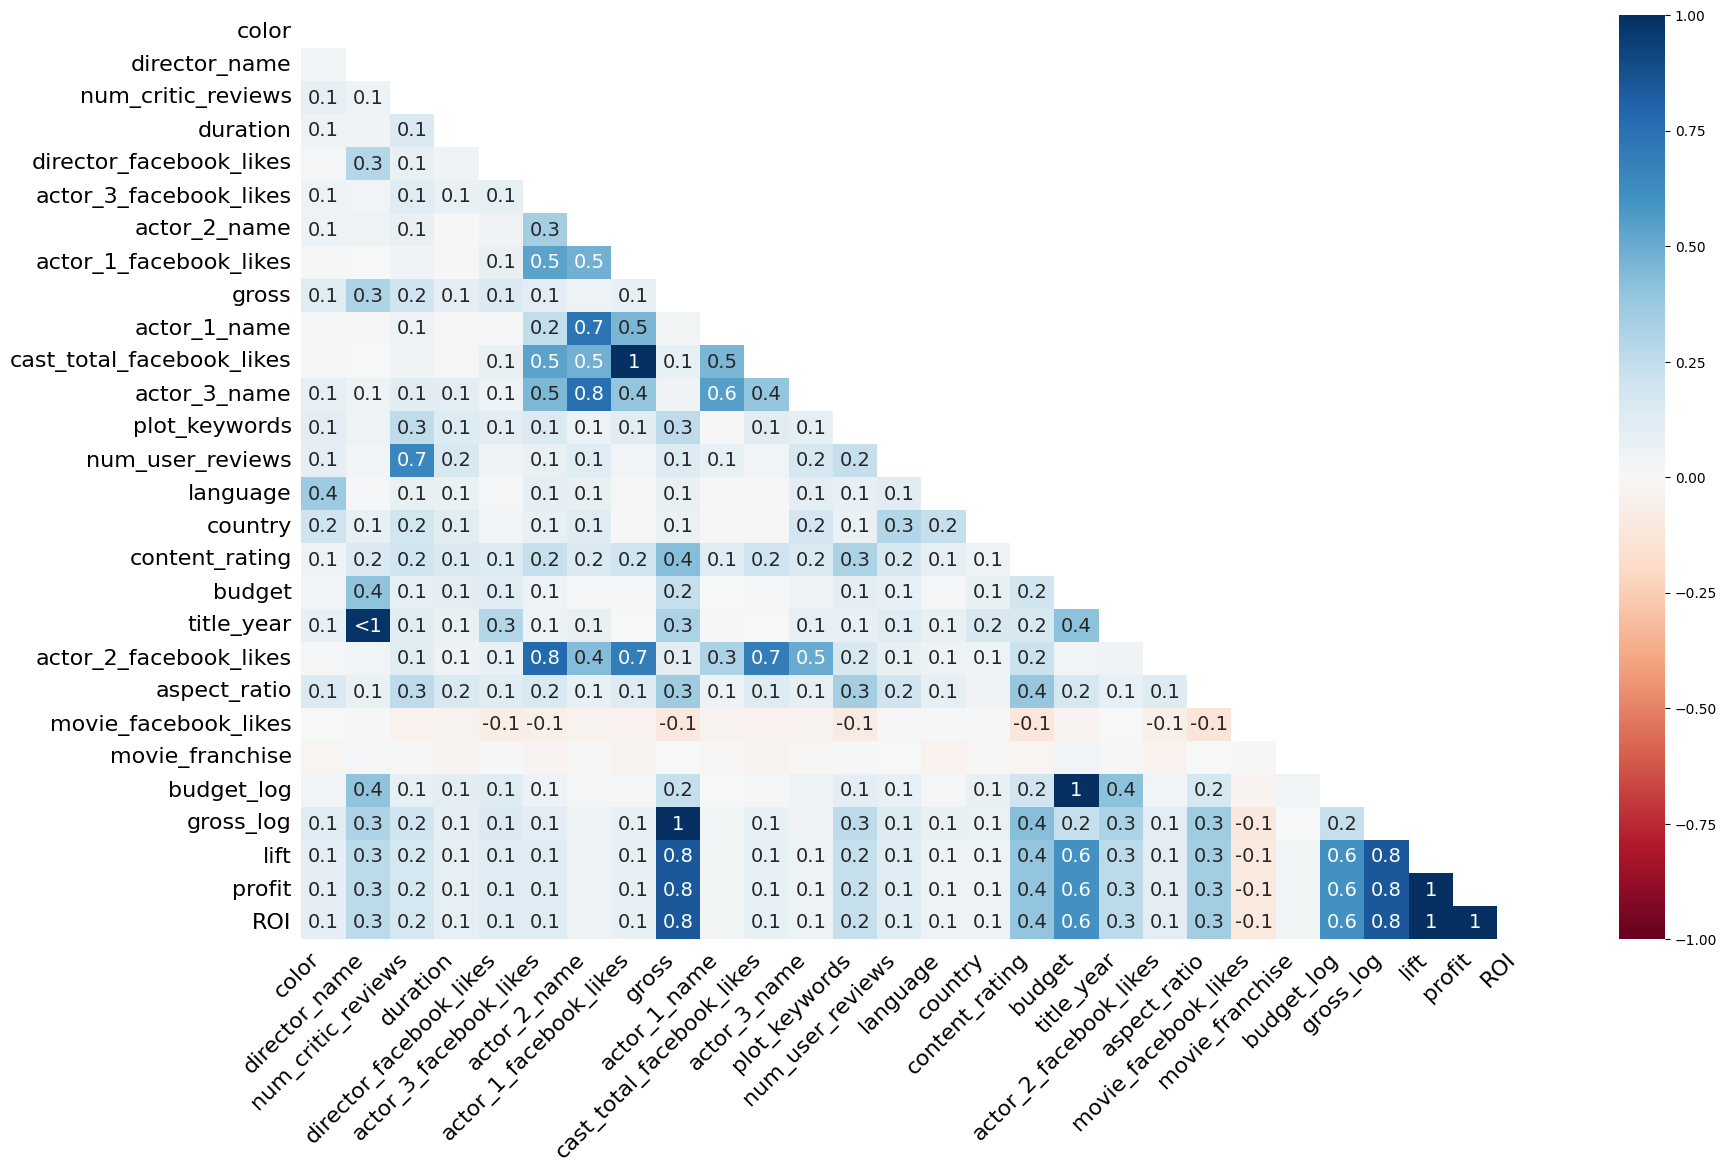

In [7]:
msno.heatmap(df)

***

Interesting that rating, budget, and year are all missing together

## A note on TV shows and TV Movies

In [8]:
# df = df.assign(movie_type = np.where(df["content_rating"].isin(['TV-MA', 'TV-14', 'TV-PG', 'TV-G', 'TV-Y7','TV-Y']), "tv", "movie"))

df["movie_type"].value_counts()

movie_type
movie    4847
tv         73
Name: count, dtype: int64

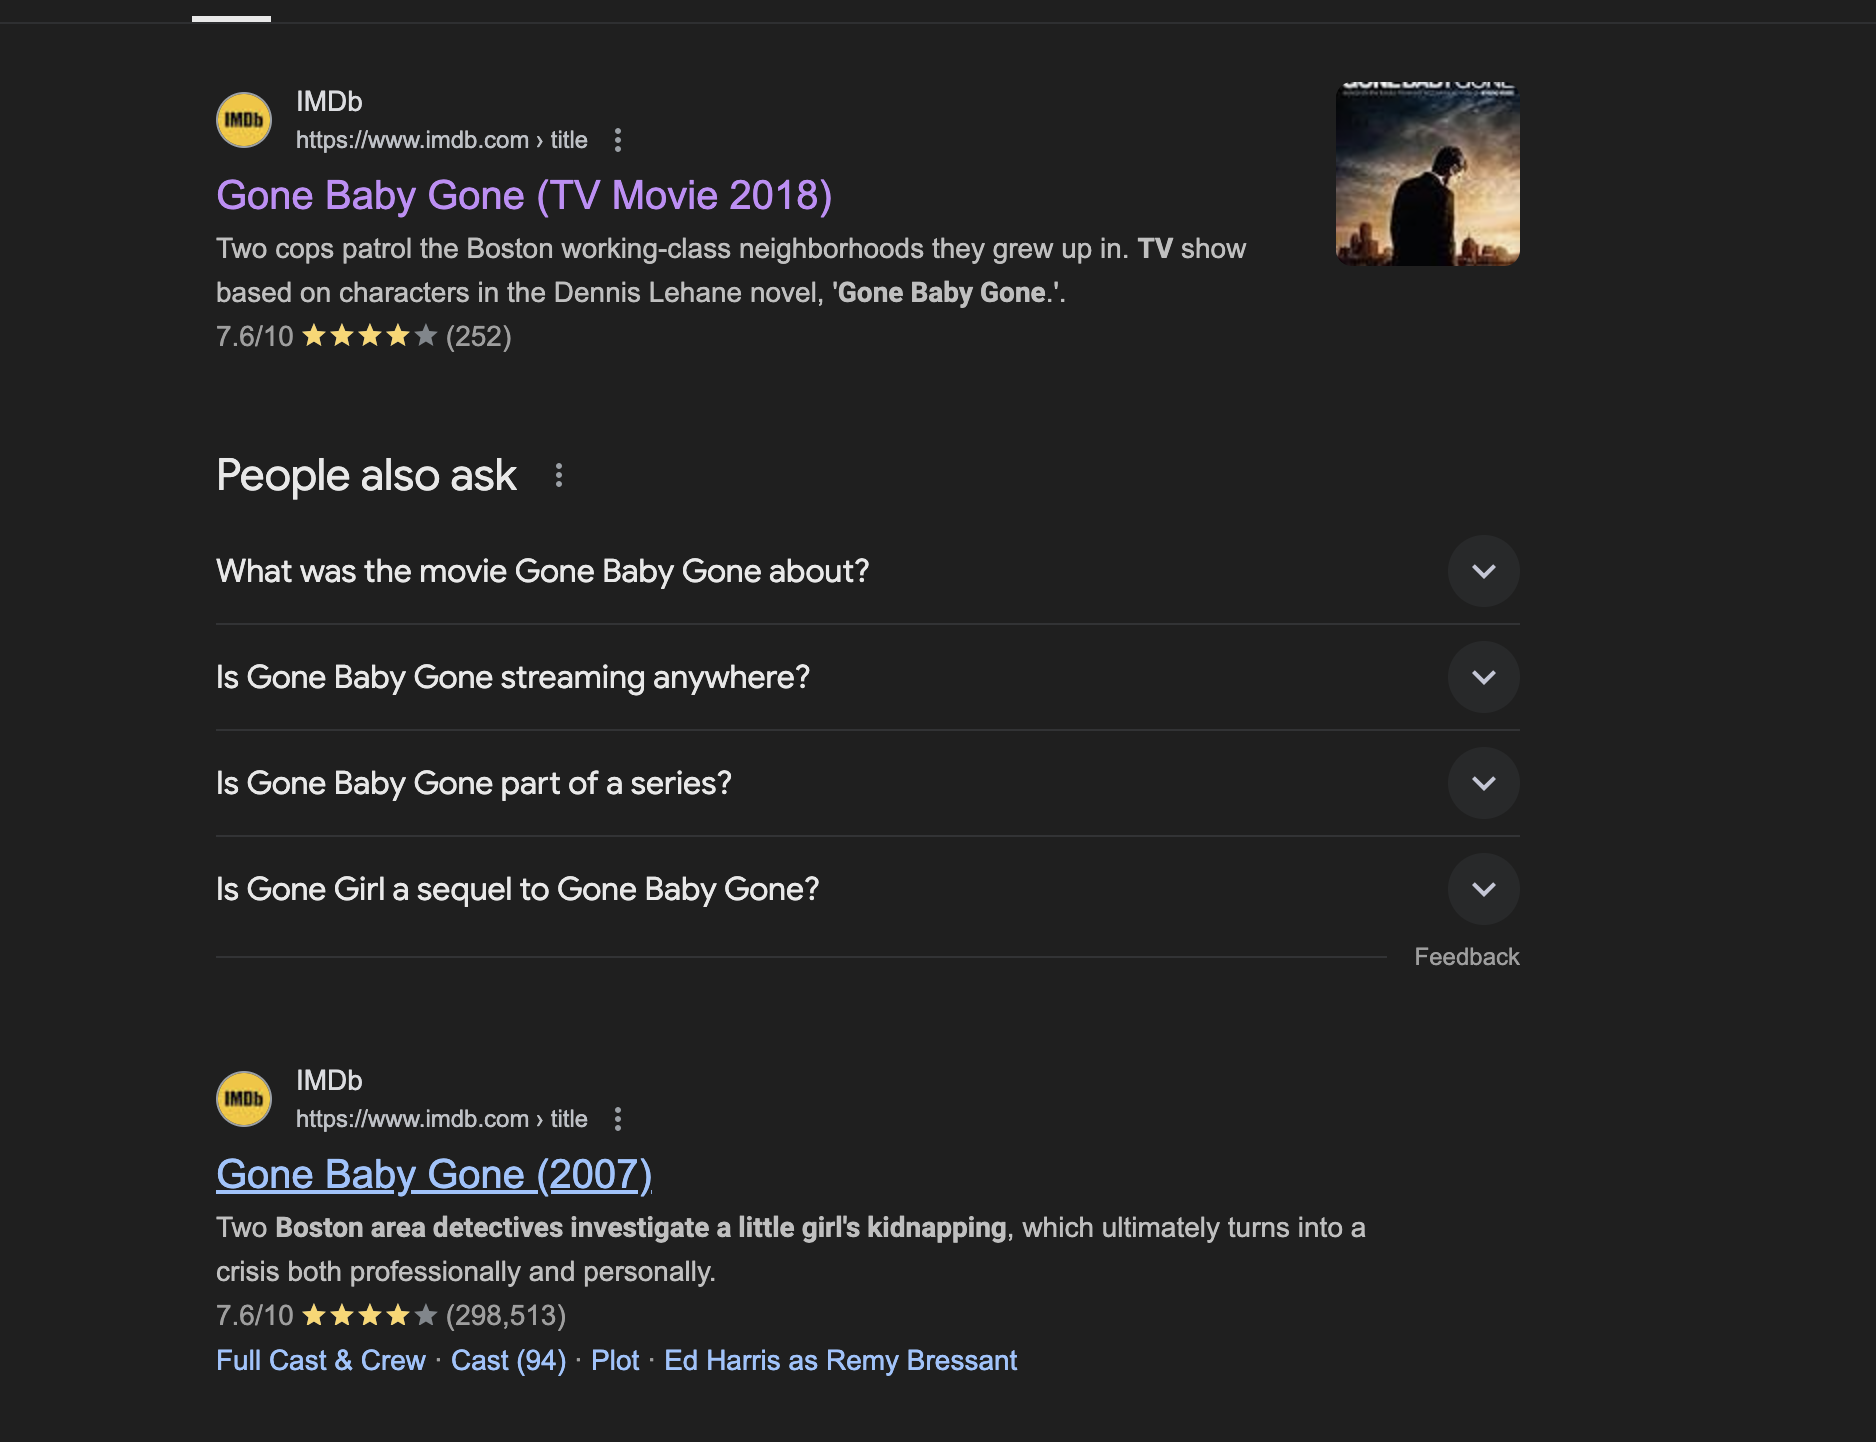

In [9]:
# either mean tv shows or tv movies its impossible to tell , heroes and daredevil are both popular shows but gone baby gone could be a tv movie

df[df["movie_type"] == "tv"][["movie_title_clean", "content_rating", "gross", "movie_score", "title_year"]]

,movie_title_clean,content_rating,gross,movie_score,title_year
459,daredevil,TV-MA,NaN,8.8,NaN
4798,heroes,TV-14,NaN,7.7,NaN
2952,spartacus war of the damned,TV-MA,NaN,8.6,NaN
3481,fargo,TV-MA,NaN,9.0,NaN
404,hannibal,TV-14,NaN,8.6,NaN
...,...,...,...,...,...
1175,mchales navy,TV-G,NaN,7.5,NaN
4209,christmas mail,TV-PG,NaN,5.8,2010.0
4243,lies in plain sight,TV-PG,NaN,6.3,2010.0
3811,we have your husband,TV-PG,NaN,5.5,2011.0


## Further Clear TV shows


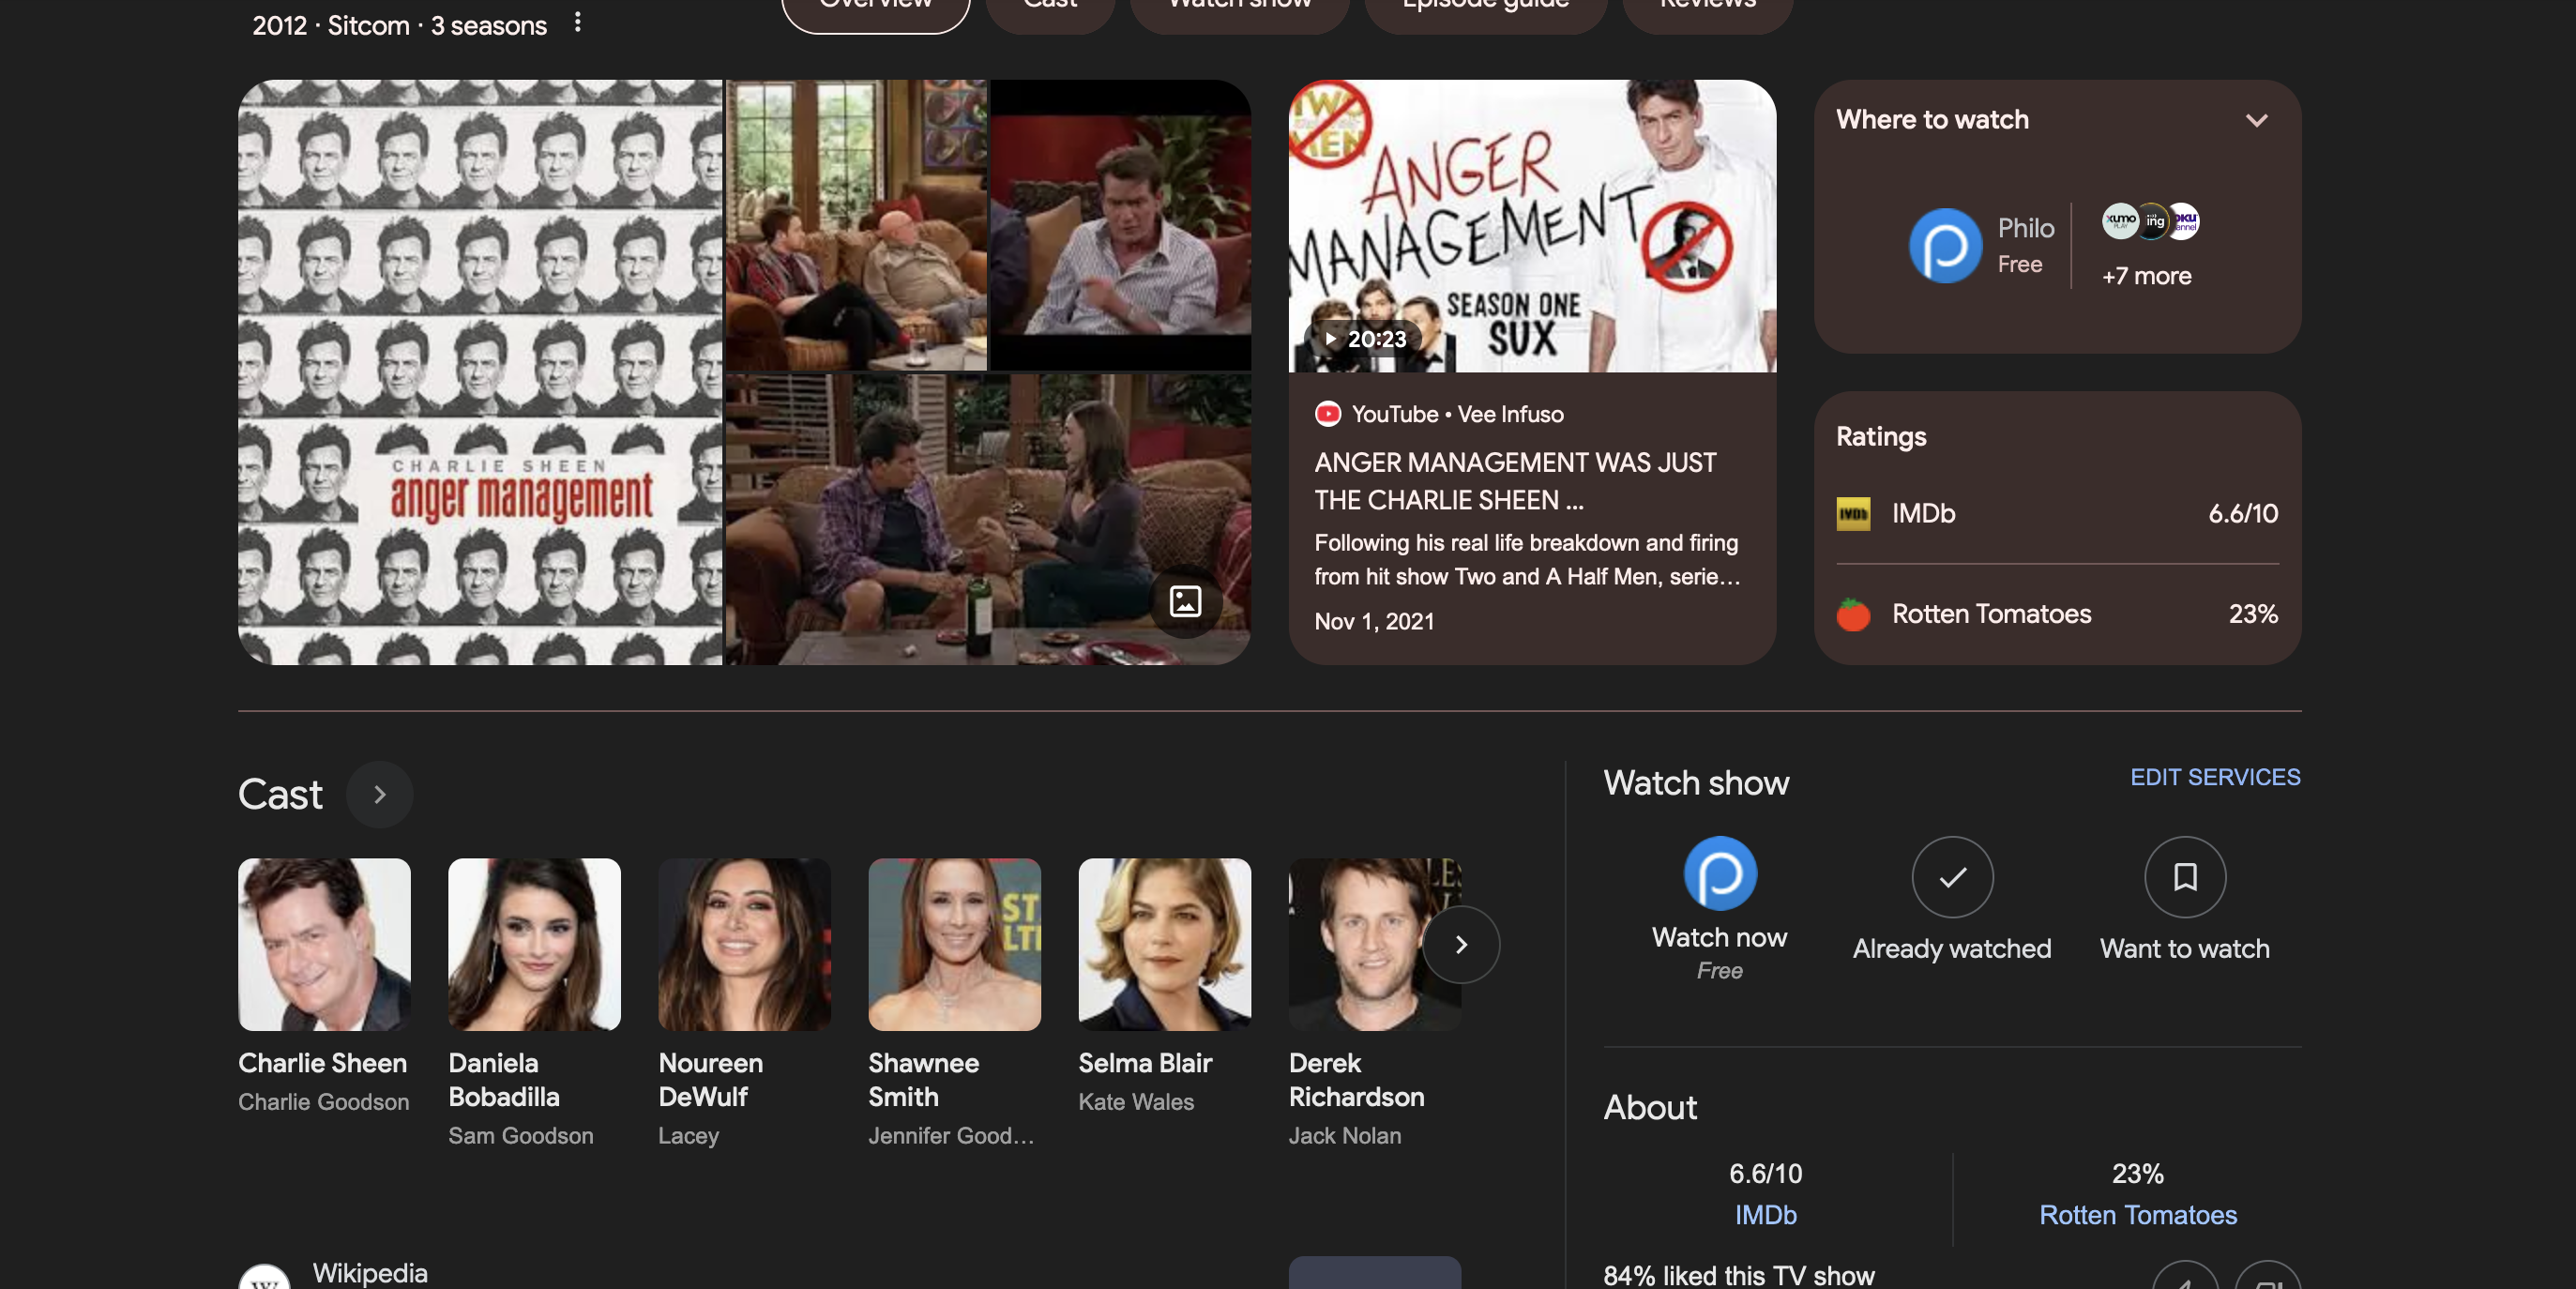

In [10]:
df = df.loc[df["movie_type"] == "movie"]

df_null = df.loc[df["title_year"].isnull(), :]

print(df_null.shape, df.shape)

df_null["movie_title"] 

df_null.sort_values("duration", ascending=False)[["movie_title", "num_users_voted", "movie_score", "gross", "language", "country", "duration"]]

(43, 35) (4847, 35)


,movie_title,num_users_voted,movie_score,gross,language,country,duration
1710,Trapped,2308,8.2,NaN,Icelandic,Iceland,511.0
2466,Carlos,10111,7.7,145118.0,English,France,334.0
2727,The Company,3828,7.9,NaN,English,USA,286.0
3650,Emma,10388,8.2,NaN,English,UK,240.0
4087,Deadline Gallipoli,299,7.4,NaN,English,Australia,197.0
4113,Creature,2011,5.0,NaN,English,USA,173.0
3419,Wuthering Heights,6053,7.7,NaN,English,UK,142.0
4460,The Streets of San Francisco,3405,7.3,NaN,English,USA,120.0
994,A Touch of Frost,4438,7.8,NaN,English,UK,105.0
2870,Del 1 - Män som hatar kvinnor,335,8.1,NaN,Swedish,Sweden,88.0


These are tv shows, including some famous ones like Yu Gi Oh and Nikita

* others like Anger management and 10,000 BC share some famous names with some movies but given we don't have a budget or a title_year have to assume these are tv shows
* Carlos and Emma are tv mini series